In [608]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [609]:
df = pd.read_csv(r"C:\Users\Aditya Koul\OneDrive\Desktop\dataset\DEX_VOLUME_MONTHLY - OVERALL LIST MONTH.csv")

## Lets try to just view the data a bit ##


In [610]:
print(df.columns)
print("\nFirst 5 rows are as follows : \n")
print(df.head)

Index(['Month', 'Monthly Diff', 'TOTAL', 'uniswap', 'spiritswap', 'balancer',
       'curve', 'apeswap', 'iziswap', 'trader joe', 'biswap', 'swapr',
       'spookyswap', 'equalizer_exchange', 'spartacus_exchange', 'sushiswap',
       'clipper', 'beethoven_x', 'kyberswap', 'airswap', 'maverick',
       'ellipsis_finance', 'integral', 'defiswap', 'mstable', 'onepunchswap',
       'quickswap', 'pancakeswap', 'babyswap', 'glacier', 'DODO', 'shibaswap',
       'synthetix', 'nomiswap', 'rubicon', 'hashflow', 'wombat', 'wigoswap',
       'Bancor Network', 'velodrome', 'fraxswap', 'mdex', 'arbswap', 'zipswap',
       'gmx', 'verse_dex', 'dfx', 'platypus_finance', 'woofi', 'zigzag'],
      dtype='object')

First 5 rows are as follows : 

<bound method NDFrame.head of          Month Monthly Diff            TOTAL         uniswap     spiritswap  \
0   2021-04-01        0,00%    8 781 053 475   2 011 936 768     65 867 285   
1   2021-05-01       31,11%  281 987 698 860  90 829 997 772  1 004 019 2

In [611]:
df.describe()

,Month,Monthly Diff,TOTAL,uniswap,spiritswap,balancer,curve,apeswap,iziswap,trader joe,...,fraxswap,mdex,arbswap,zipswap,gmx,verse_dex,dfx,platypus_finance,woofi,zigzag
count,25,25,25,25,25,25,25,25,12,22,...,12,25,12,17,21,11,23,16,16,3
unique,25,25,25,25,25,25,25,25,12,22,...,12,25,12,17,21,11,23,16,16,3
top,2021-04-01,"0,00%",8 781 053 475,2 011 936 768,65 867 285,148 971 753,323 404 383,207 367 016,15 865 151,21 960 716,...,6 382 513,2 611 804 107,5,15 378,125,88,1 101 660,1 225 335,177 916,145 896 496
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [612]:
print(df.isna().count(), "\n", df.dtypes)

Month                 25
Monthly Diff          25
TOTAL                 25
uniswap               25
spiritswap            25
balancer              25
curve                 25
apeswap               25
iziswap               25
trader joe            25
biswap                25
swapr                 25
spookyswap            25
equalizer_exchange    25
spartacus_exchange    25
sushiswap             25
clipper               25
beethoven_x           25
kyberswap             25
airswap               25
maverick              25
ellipsis_finance      25
integral              25
defiswap              25
mstable               25
onepunchswap          25
quickswap             25
pancakeswap           25
babyswap              25
glacier               25
DODO                  25
shibaswap             25
synthetix             25
nomiswap              25
rubicon               25
hashflow              25
wombat                25
wigoswap              25
Bancor Network        25
velodrome             25


In [613]:
df['uniswap']

0      2 011 936 768
1     90 829 997 772
2     59 292 663 051
3     39 845 604 044
4     54 730 196 334
5     54 065 940 927
6     63 464 770 105
7     90 679 981 026
8     87 240 789 860
9     75 861 263 288
10    58 291 016 886
11    55 030 536 298
12    71 137 045 679
13    74 229 420 366
14    50 537 356 692
15    45 259 801 509
16    44 247 267 653
17    36 054 636 828
18    51 972 914 157
19    51 655 395 161
20    21 830 434 378
21    35 624 712 298
22    46 813 044 040
23    73 636 133 100
24    38 060 380 074
Name: uniswap, dtype: object

# LET'S TRY TO PREPROCESS THE DATA A BIT #

In [614]:
for i in df.columns[2:]:
    df[i] = (
        df[i].astype(str).str.replace(' ','').str.replace(',','.').str.replace('\u202F','').str.replace('\xa0', '')
    )
    df[i] = pd.to_numeric(df[i], errors = 'coerce')
print(df.head)
print( "\n Data Type is : ", df.dtypes)

<bound method NDFrame.head of          Month Monthly Diff         TOTAL      uniswap  spiritswap  \
0   2021-04-01        0,00%    8781053475   2011936768    65867285   
1   2021-05-01       31,11%  281987698860  90829997772  1004019203   
2   2021-06-01      -53,88%  130044898801  59292663051   116513820   
3   2021-07-01      -28,27%   93284555502  39845604044    46169186   
4   2021-08-01       34,17%  125161244035  54730196334   217842891   
5   2021-09-01        7,90%  135050694873  54065940927   703003003   
6   2021-10-01       22,01%  164773836101  63464770105  1750555895   
7   2021-11-01       40,66%  231777364565  90679981026   878947803   
8   2021-12-01       -9,60%  209523549192  87240789860   837024373   
9   2022-01-01       -2,40%  204487879847  75861263288  2388852659   
10  2022-02-01      -37,35%  128120965838  58291016886   854912120   
11  2022-03-01       -4,16%  122786618162  55030536298   967355081   
12  2022-04-01       18,64%  145678184370  71137045679   575

In [615]:

# df['Month'] = pd.to_datetime(df['Month'], errors = 'coerce')
# df['Month'].dtype
# df['Month'] = df['Month'].dt.month
# print(df['Month']) 
print(df['Month'])
df['Month'] = df['Month'].astype(str)
df['month'] = df['Month'].str[5:7]
df['month'] = pd.to_numeric(df['month'], errors = 'coerce')
df['Month'] = df['Month'].str[:7].replace('-','.')
print(df['month'])
df['Month'] = df['month']

0     2021-04-01
1     2021-05-01
2     2021-06-01
3     2021-07-01
4     2021-08-01
5     2021-09-01
6     2021-10-01
7     2021-11-01
8     2021-12-01
9     2022-01-01
10    2022-02-01
11    2022-03-01
12    2022-04-01
13    2022-05-01
14    2022-06-01
15    2022-07-01
16    2022-08-01
17    2022-09-01
18    2022-10-01
19    2022-11-01
20    2022-12-01
21    2023-01-01
22    2023-02-01
23    2023-03-01
24    2023-04-01
Name: Month, dtype: object
0      4
1      5
2      6
3      7
4      8
5      9
6     10
7     11
8     12
9      1
10     2
11     3
12     4
13     5
14     6
15     7
16     8
17     9
18    10
19    11
20    12
21     1
22     2
23     3
24     4
Name: month, dtype: int64


In [616]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

    Month Monthly Diff         TOTAL      uniswap  spiritswap      balancer  \
0       4        0,00%    8781053475   2011936768    65867285     148971753   
1       5       31,11%  281987698860  90829997772  1004019203    4325119635   
2       6      -53,88%  130044898801  59292663051   116513820    1356922016   
3       7      -28,27%   93284555502  39845604044    46169186    1492908501   
4       8       34,17%  125161244035  54730196334   217842891    1676822015   
5       9        7,90%  135050694873  54065940927   703003003    2356330867   
6      10       22,01%  164773836101  63464770105  1750555895    3199329024   
7      11       40,66%  231777364565  90679981026   878947803    3404912946   
8      12       -9,60%  209523549192  87240789860   837024373    3647576632   
9       1       -2,40%  204487879847  75861263288  2388852659    3461500619   
10      2      -37,35%  128120965838  58291016886   854912120    2547874868   
11      3       -4,16%  122786618162  55030536298   

In [617]:
null_summary = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100
})
print(null_summary)

                    Null Count  Percentage
Month                        0         0.0
Monthly Diff                 0         0.0
TOTAL                        0         0.0
uniswap                      0         0.0
spiritswap                   0         0.0
balancer                     0         0.0
curve                        0         0.0
apeswap                      0         0.0
iziswap                     13        52.0
trader joe                   3        12.0
biswap                       1         4.0
swapr                        0         0.0
spookyswap                   0         0.0
equalizer_exchange          21        84.0
spartacus_exchange          12        48.0
sushiswap                    0         0.0
clipper                      2         8.0
beethoven_x                  5        20.0
kyberswap                    0         0.0
airswap                      0         0.0
maverick                    22        88.0
ellipsis_finance             0         0.0
integral   

In [618]:
cols_to_drop = null_summary[null_summary['Percentage'] > 50].index  

df = df.drop(columns=cols_to_drop)

print("Dropped columns:", list(cols_to_drop))
print("Remaining columns:", df.columns)

Dropped columns: ['iziswap', 'equalizer_exchange', 'maverick', 'onepunchswap', 'quickswap', 'glacier', 'nomiswap', 'rubicon', 'velodrome', 'fraxswap', 'arbswap', 'verse_dex', 'zigzag']
Remaining columns: Index(['Month', 'Monthly Diff', 'TOTAL', 'uniswap', 'spiritswap', 'balancer',
       'curve', 'apeswap', 'trader joe', 'biswap', 'swapr', 'spookyswap',
       'spartacus_exchange', 'sushiswap', 'clipper', 'beethoven_x',
       'kyberswap', 'airswap', 'ellipsis_finance', 'integral', 'defiswap',
       'mstable', 'pancakeswap', 'babyswap', 'DODO', 'shibaswap', 'synthetix',
       'hashflow', 'wombat', 'wigoswap', 'Bancor Network', 'mdex', 'zipswap',
       'gmx', 'dfx', 'platypus_finance', 'woofi', 'month'],
      dtype='object')


### Lets assume that in the remaining days when the reading is Nan assume it to 0 ####

In [619]:
# list(df['Month'].unique())
# len(df['Month'])
df = df.fillna(0)
null_summary = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100
})
print(null_summary)

                    Null Count  Percentage
Month                        0         0.0
Monthly Diff                 0         0.0
TOTAL                        0         0.0
uniswap                      0         0.0
spiritswap                   0         0.0
balancer                     0         0.0
curve                        0         0.0
apeswap                      0         0.0
trader joe                   0         0.0
biswap                       0         0.0
swapr                        0         0.0
spookyswap                   0         0.0
spartacus_exchange           0         0.0
sushiswap                    0         0.0
clipper                      0         0.0
beethoven_x                  0         0.0
kyberswap                    0         0.0
airswap                      0         0.0
ellipsis_finance             0         0.0
integral                     0         0.0
defiswap                     0         0.0
mstable                      0         0.0
pancakeswap

# Lets take a look at the second csv provided #

In [620]:
dfx = pd.read_csv(r"C:\Users\Aditya Koul\OneDrive\Desktop\dataset\QUERY_DB_DEX_VOLUME_MONTHLY - ORIGINAL-DB-DEX_VOLUME_MONTHLY.csv")
print(dfx.isna().sum())
print('\n', dfx.head)

Project           0
Month             0
Monthly Volume    0
dtype: int64

 <bound method NDFrame.head of         Project       Month Monthly Volume
0    spiritswap  2023-04-01      5 888 666
1      balancer  2023-04-01  1 471 773 238
2         curve  2023-04-01  3 595 163 230
3       apeswap  2023-04-01     35 551 463
4       iziswap  2023-04-01      4 302 574
..          ...         ...            ...
843    defiswap  2021-04-01      3 935 462
844     airswap  2021-04-01      5 838 444
845        mdex  2021-04-01  2 611 804 107
846     mstable  2021-04-01      3 444 210
847     apeswap  2021-04-01    207 367 016

[848 rows x 3 columns]>


In [621]:
for i in dfx.columns[2:]:
    dfx[i] = (
        dfx[i].astype(str).str.replace(' ','').str.replace(',','.').str.replace('\u202F','').str.replace('\xa0', '')
    )
    dfx[i] = pd.to_numeric(dfx[i], errors = 'coerce')
print(dfx.head)

<bound method NDFrame.head of         Project       Month  Monthly Volume
0    spiritswap  2023-04-01         5888666
1      balancer  2023-04-01      1471773238
2         curve  2023-04-01      3595163230
3       apeswap  2023-04-01        35551463
4       iziswap  2023-04-01         4302574
..          ...         ...             ...
843    defiswap  2021-04-01         3935462
844     airswap  2021-04-01         5838444
845        mdex  2021-04-01      2611804107
846     mstable  2021-04-01         3444210
847     apeswap  2021-04-01       207367016

[848 rows x 3 columns]>


In [622]:
dfx['Month'] = dfx['Month'].astype(str)
print(dfx['Month'].unique())
dfx['Month'] = dfx['Month'].astype(str)
dfx['month'] = dfx['Month'].str[:7].replace('-','.')
#df['month'] = pd.to_numeric(df['month'], errors = 'coerce')
print(dfx['month'])
dfx['Month'] = dfx['month']

['2023-04-01' '2023-03-01' '2023-02-01' '2023-01-01' '2022-12-01'
 '2022-11-01' '2022-10-01' '2022-09-01' '2022-08-01' '2022-07-01'
 '2022-06-01' '2022-05-01' '2022-04-01' '2022-03-01' '2022-02-01'
 '2022-01-01' '2021-12-01' '2021-11-01' '2021-10-01' '2021-09-01'
 '2021-08-01' '2021-07-01' '2021-06-01' '2021-05-01' '2021-04-01']
0      2023-04
1      2023-04
2      2023-04
3      2023-04
4      2023-04
        ...   
843    2021-04
844    2021-04
845    2021-04
846    2021-04
847    2021-04
Name: month, Length: 848, dtype: object


# First Csv Visualisation #

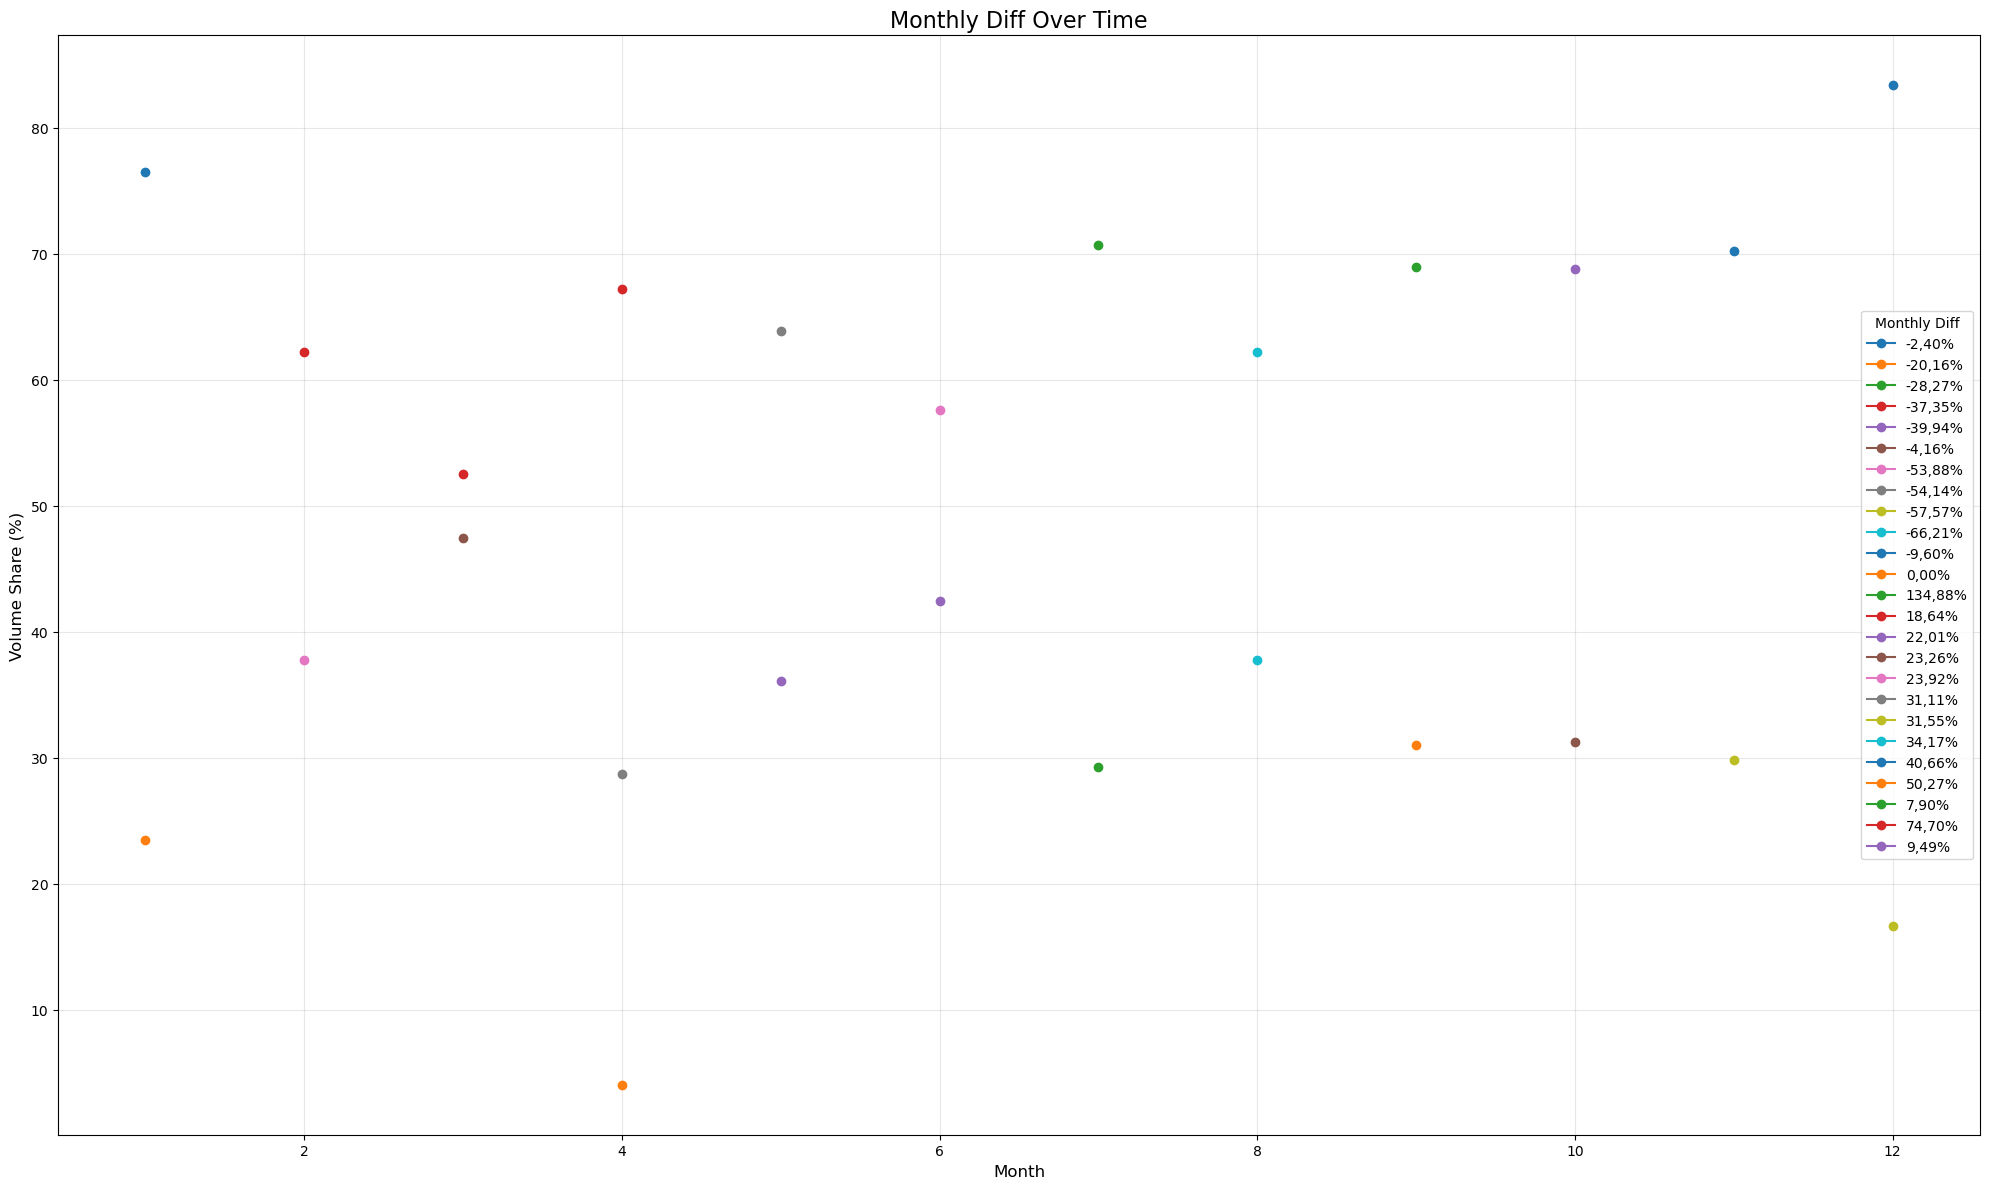

In [623]:
monthly_volumes = df.groupby(['Month', 'Monthly Diff'])['TOTAL'].sum().reset_index()

total_volume = monthly_volumes.groupby('Month')['TOTAL'].sum().reset_index()
total_volume = total_volume.rename(columns={'TOTAL': 'Total_Volume'})

monthly_volumes = monthly_volumes.merge(total_volume, on='Month')
monthly_volumes['Share'] = (monthly_volumes['TOTAL'] / monthly_volumes['Total_Volume']) * 100
pivot_df = monthly_volumes.pivot(index='Month', columns='Monthly Diff', values='Share')

plt.figure(figsize=(20,12))
for dex in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[dex], marker='o', label=dex)

plt.title("Monthly Diff Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Volume Share (%)", fontsize=12)
plt.legend(title="Monthly Diff")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

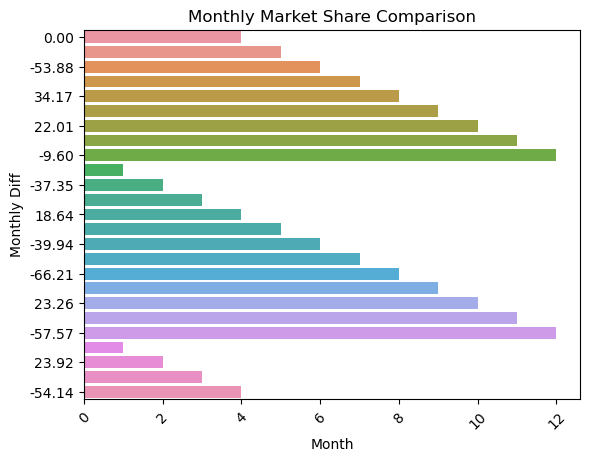

In [624]:
import seaborn as sns
import matplotlib.ticker as ticker

df["Monthly Diff"]=df["Monthly Diff"].replace('%','',regex=True).replace(',','.',regex=True)
sns.barplot( x=df["Month"], y=df["Monthly Diff"])
plt.title("Monthly Market Share Comparison")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=15)) 
plt.show()

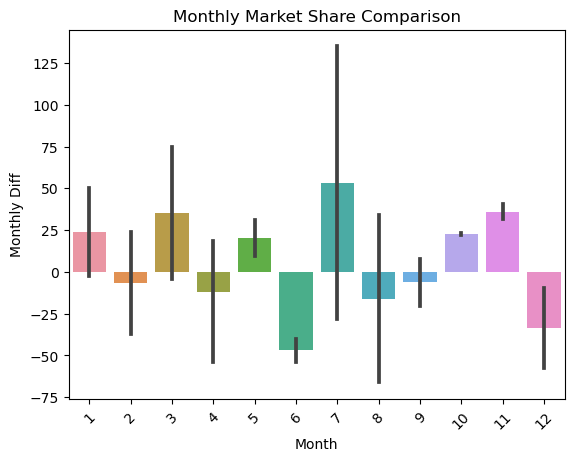

In [625]:

df["Monthly Diff"]=df["Monthly Diff"].replace('%','',regex=True).replace(',','.',regex=True).astype(float)
sns.barplot( x=df["Month"], y=df["Monthly Diff"])
plt.title("Monthly Market Share Comparison")
plt.xticks(rotation=45)
plt.show()

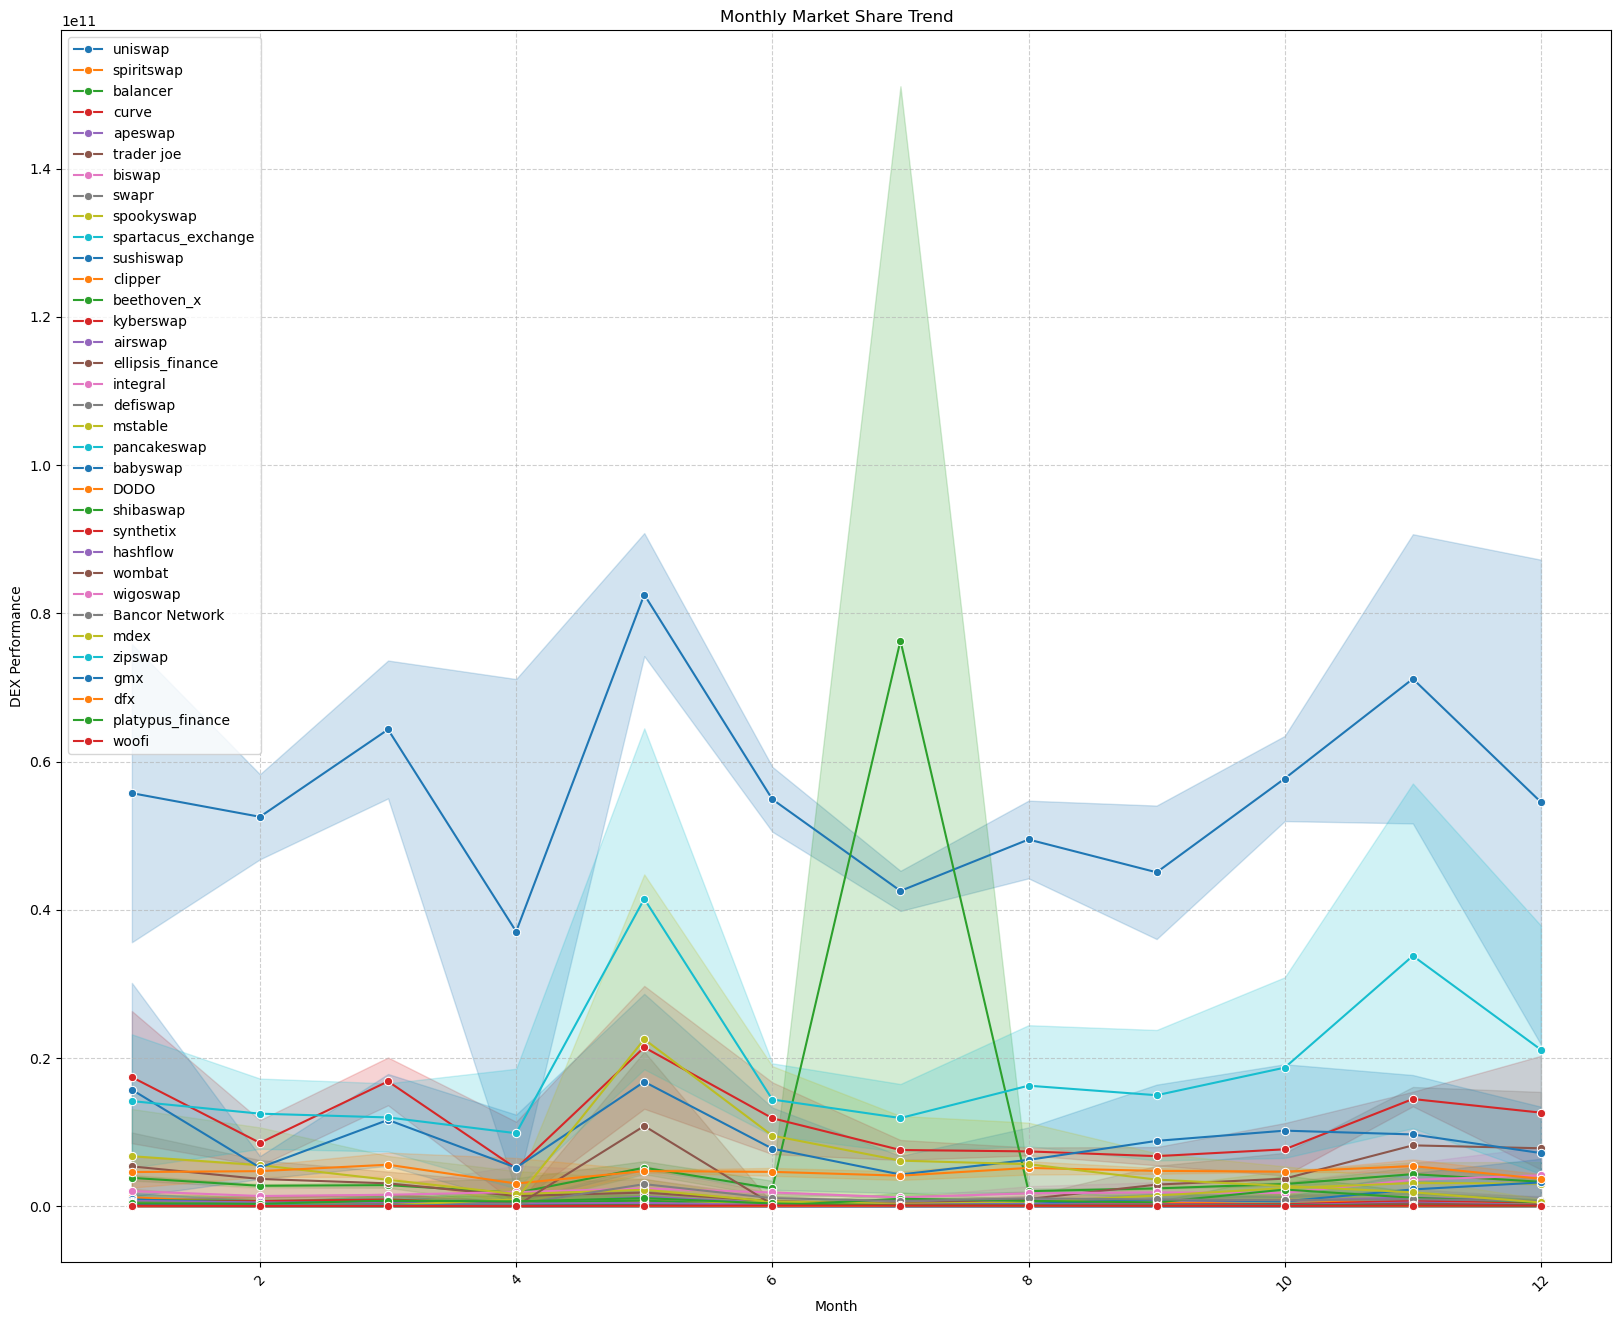

In [626]:
plt.figure(figsize=(20,16))
for i in df.columns[3:len(df.columns)-1]:
    sns.lineplot(x="Month", y=df[i].astype(float), marker="o", data=df, label=i)
plt.title("Monthly Market Share Trend")
plt.xticks(rotation=45)
plt.ylabel("DEX Performance")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


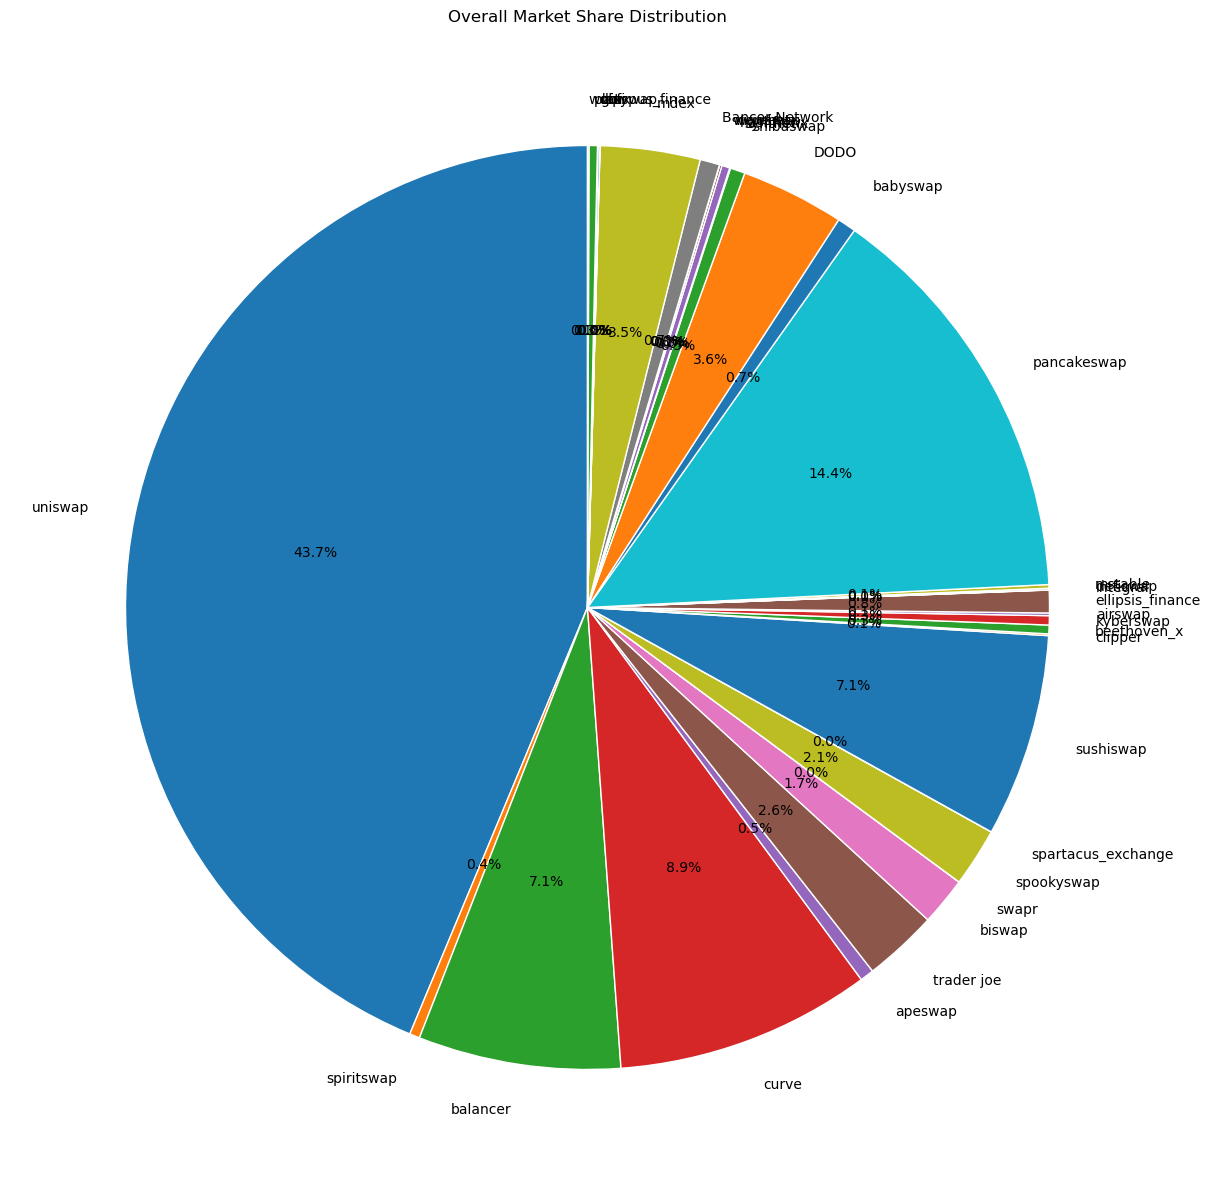

In [627]:

dex_totals = df[df.columns[3:len(df.columns)-1]].astype(float).sum()

plt.figure(figsize=(21,15))
plt.pie(dex_totals, labels=dex_totals.index, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'edgecolor': 'white'})
plt.title("Overall Market Share Distribution")
plt.show()


#### Completely GPT given ####

C:\Users\Aditya Koul\AppData\Local\Temp\ipykernel_16920\252153636.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dex_final = top_dex.append(pd.Series({"Others": others}))


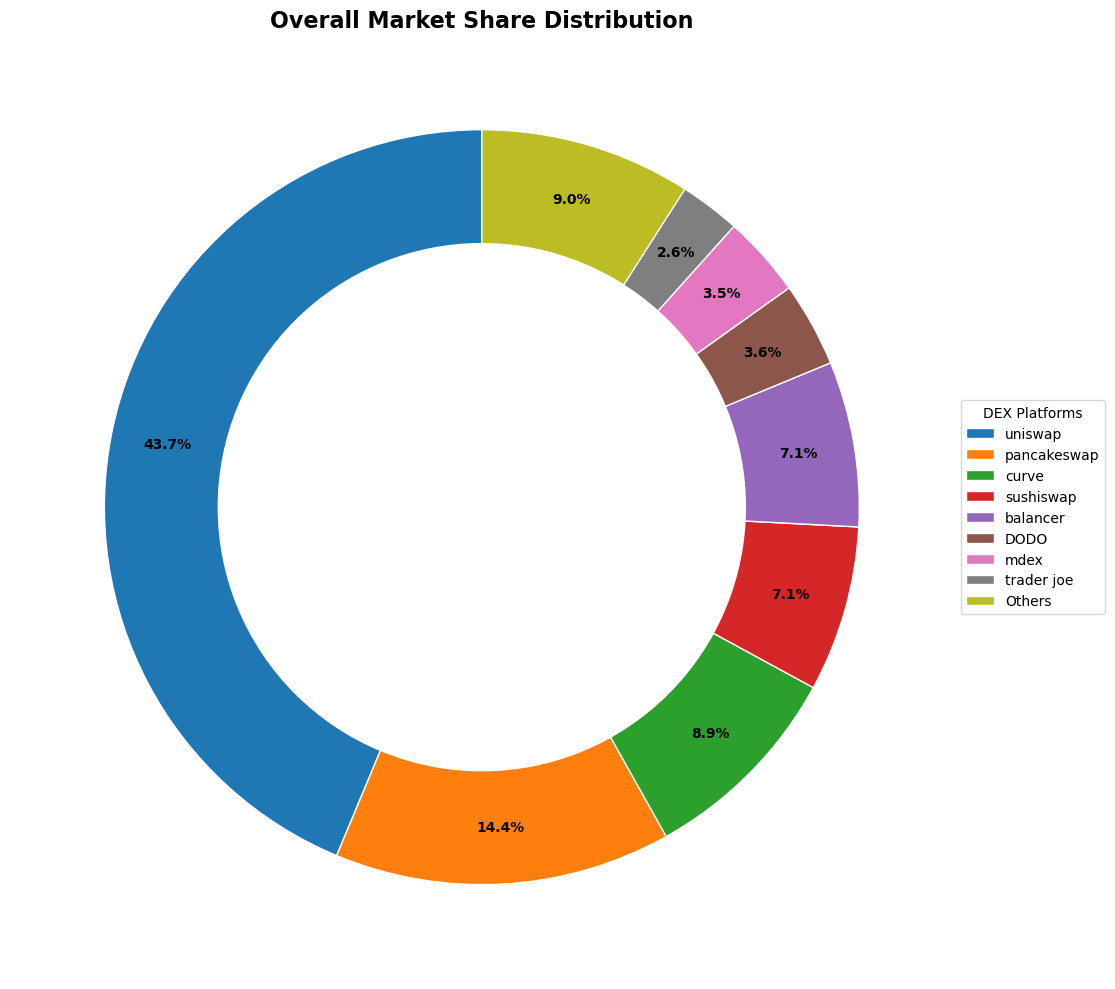

In [628]:
import matplotlib.pyplot as plt

# calculate totals
dex_totals = df[df.columns[3:len(df.columns)-1]].astype(float).sum()

# sort and keep top 8, rest grouped into "Others"
dex_totals_sorted = dex_totals.sort_values(ascending=False)
top_n = 8
top_dex = dex_totals_sorted[:top_n]
others = dex_totals_sorted[top_n:].sum()
dex_final = top_dex.append(pd.Series({"Others": others}))

# plot
plt.figure(figsize=(14,10))
wedges, texts, autotexts = plt.pie(
    dex_final,
    labels=None,   # don't print directly on wedges
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,  # move percentage text closer
    wedgeprops={'edgecolor': 'white'}
)

# donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# add legend outside
plt.legend(
    wedges,
    dex_final.index,
    title="DEX Platforms",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# style
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Overall Market Share Distribution", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


## Second csv Visualisation ##

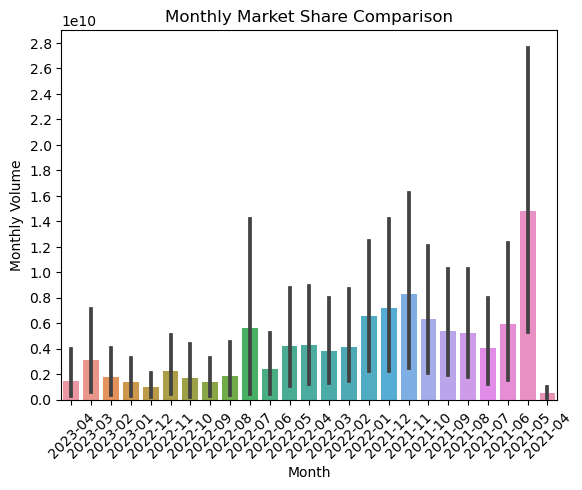

In [629]:
import seaborn as sns
import matplotlib.ticker as ticker

sns.barplot( x=dfx["Month"], y=dfx["Monthly Volume"])
plt.title("Monthly Market Share Comparison")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=15)) 
plt.show()

In [630]:
dfx.columns

Index(['Project', 'Month', 'Monthly Volume', 'month'], dtype='object')

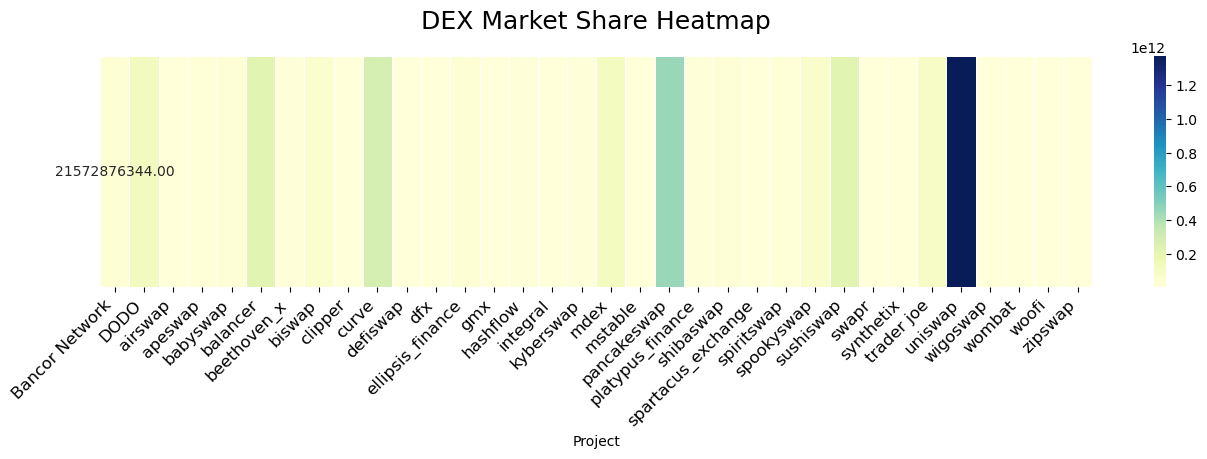

In [631]:
heatmap_data = dex_totals.reset_index()
heatmap_data.columns = ['Project', 'Monthly Volume']

heatmap_pivot = heatmap_data.pivot_table(values='Monthly Volume', columns='Project')

plt.figure(figsize=(16, 3))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5)

plt.title("DEX Market Share Heatmap", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks([])
plt.show()
